<a href="https://colab.research.google.com/github/juangarcesco/PROYECTO_CALL_CENTER/blob/main/PRUEBA_CALL_CENTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

``

## Importacion de librerias

In [309]:
# cargar los datos desde el archivo csv.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import seaborn as sns
from scipy.stats import zscore

## Carga de datos csv

In [310]:
#Creamos el dataframe a partir del archivo csv
df = pd.read_csv('Call_Center_1999_DataSet.csv', sep=";")

<ipython-input-310-8099444c71d3>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Call_Center_1999_DataSet.csv', sep=";")


## Renombrado de columnas

In [446]:
#Creamos un diccionario con la traduccion de los valores de las columnas
dicc_cambio_de_nombres={'vru.line': 'Linea_VRU', 'call_id': 'ID_de_llamada','customer_id':'ID_de_CLIENTE','priority':'prioridad','type':'tipo_de_servicio', 'date':'fecha(a-m-d)','vru_entry':'hora_entrada_llamada', 'vru_exit':'hora_salida_llamada','vru_time':'tiempo_espera_calc(seg)','q_start':'hora_entrada_cola', 'q_exit':'hora_salida_cola','q_time':'tiempo_cola_calc(seg)','outcome':'tipo_de_llamada','ser_start':'hora_ent_servicio', 'ser_exit':'hora_sal_servicio', 'ser_time':'tiempo_de_serv_calc(seg)','server':'SERVIDOR'}

In [448]:
#Renombramos las columnas con los nombres del diccionario
df = df.rename(columns=dicc_cambio_de_nombres)

## Eliminacion de columna

In [313]:
#Eliminamos la columna que no tiene ningun valor
df = df.drop('startdate',axis=1)

## Reordenamiento de columnas

In [314]:
#Ordenamos las columnas con un orden mas significativo
df = df[['fecha(a-m-d)','ID_de_CLIENTE', 'ID_de_llamada', 'tipo_de_llamada', 'prioridad', 'tipo_de_servicio','SERVIDOR', 'Linea_VRU', 'hora_entrada_llamada', 'hora_salida_llamada', 'tiempo_espera_calc(seg)', 'hora_entrada_cola', 'hora_salida_cola', 'tiempo_cola_calc(seg)', 'hora_ent_servicio', 'hora_sal_servicio', 'tiempo_de_serv_calc(seg)']]

## Ajuste de datatypes

In [315]:
df['Linea_VRU'] = df['Linea_VRU'].astype(str)

In [316]:
df['prioridad'] = df['prioridad'].astype('category')

In [317]:
df['tipo_de_llamada'] = df['tipo_de_llamada'].astype('category')

In [318]:
df['SERVIDOR'] = df['SERVIDOR'].astype('category')

In [319]:
df['ID_de_CLIENTE'] = pd.to_numeric(df['ID_de_CLIENTE'], errors='coerce', downcast='integer')

# **CLIENTES**
Descripcion
* Es la identificación del cliente. Es única por cliente.
* Si el ID es cero: - es porque el sistema no pudo identificar a la persona que realiza la llamada - Para el caso de los prospectos no se identifican = Nuevo posible cliente

In [320]:
total_clientes_sin_identificar = df['ID_de_CLIENTE'][df['ID_de_CLIENTE'] == 0].count()

In [321]:
total_clientes_sin_identificar = df['ID_de_CLIENTE'][df['ID_de_CLIENTE'] == 0].count()

In [322]:
clientes_potenciales_con_id_0 = df['ID_de_CLIENTE'][(df['ID_de_CLIENTE'] == 0) & (df['tipo_de_servicio']== 'NW')].count()

In [323]:
clientes_potenciales = df['ID_de_CLIENTE'][(df['tipo_de_servicio']== 'NW')].count()

In [324]:
clientes_identificados = df['ID_de_CLIENTE'][(df['ID_de_CLIENTE']!=0 )].count()

In [325]:
conteo_numero_clientes= df['ID_de_CLIENTE'].value_counts()

## Creacion de nueva columna para reclasificacion de clientes

In [326]:
df.insert(loc=1, column='CATEGORIA_CLIENTE', value=df['ID_de_CLIENTE'])

### Cambio del datatype de la nueva columna

In [327]:
df['CATEGORIA_CLIENTE'] = df['CATEGORIA_CLIENTE'].astype(str)

## Reclasificacion de categoria de cliente segun identificacion (con ID, sin ID)

In [328]:
df.loc[(df['tipo_de_servicio'] == 'NW'), 'ID_de_CLIENTE'] = 999999999999
df.loc[(df['tipo_de_servicio'] == 'NW'), 'CATEGORIA_CLIENTE'] = 'CLIENTE_PROSPECTO'
df.loc[(df['tipo_de_servicio'] != 'NW') & (df['ID_de_CLIENTE'] == 0), 'CATEGORIA_CLIENTE'] = 'CLIENTE_SIN_ID'
df.loc[(df['ID_de_CLIENTE'] != 0) & (df['ID_de_CLIENTE'] != 999999999999), 'CATEGORIA_CLIENTE'] = 'CLIENTE_CON_ID'

## Conteo

In [329]:
cantidad_unicos_categoria_cliente = df['CATEGORIA_CLIENTE'].nunique()
print(cantidad_unicos_categoria_cliente)

3


## Desglose

In [330]:
desglose_CATEGORIA_CLIENTE = df['CATEGORIA_CLIENTE'].value_counts()
desglose_CATEGORIA_CLIENTE

,count
CATEGORIA_CLIENTE,
CLIENTE_CON_ID,209565
CLIENTE_SIN_ID,167155
CLIENTE_PROSPECTO,67728


## Graficas

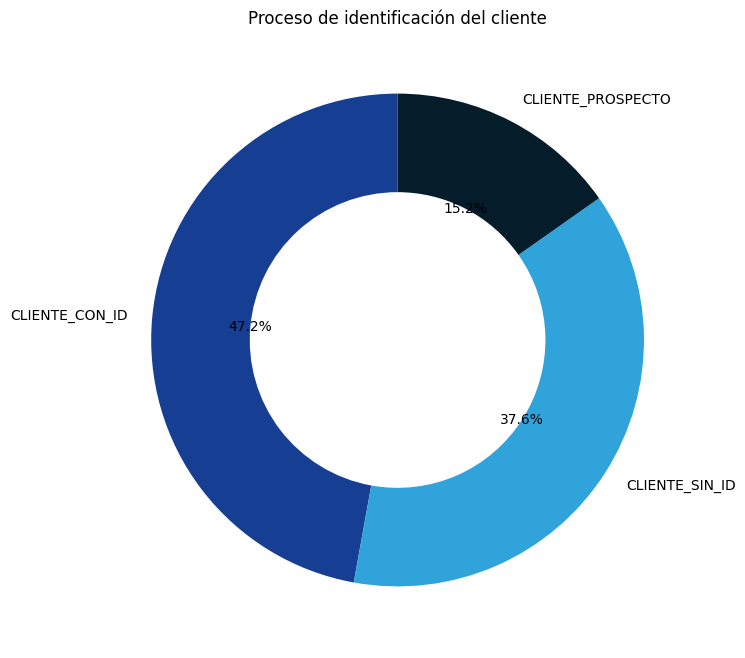

In [331]:
colors = ['#163E93','#30A3DA','#051C2A','#060200','#FFFFFF']
plt.figure(figsize=(8, 8))
plt.pie(desglose_CATEGORIA_CLIENTE, labels=customer_id_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=colors)
plt.title('Proceso de identificación del cliente')
plt.show()

# **TIPO DE SERVICIO**

## Descripcion
Es el tipo de transaccion que el cliente requiere realizar.
Hay 6 tipos diferentes de servicio:

* **PS**- Actividad Regular
* **PE** - Actividad Regular en inglés
* **IN** - Actividad / Consulta por internet
* **NE** - Actividad por Acciones (stock exchange)
* **NW** - Cliente potencial (prospecto) solicitando información
* **TT** – clientes que dejan un mensaje pidiendo al banco que le devuelvan su llamado pero que cuando el sistema automático devuelve el llamado, el agente pasó a estado “ocupado”, dejando al cliente en espera en la cola

## Conteo

In [332]:
cantidad_unicos_type = df['tipo_de_servicio'].nunique()
print(cantidad_unicos_type)

8


## Desglose

In [333]:
desglose_tipo_de_servicio = df['tipo_de_servicio'].value_counts()
desglose_tipo_de_servicio

,count
tipo_de_servicio,
PS,302522
NW,67728
NE,39342
IN,20732
TT,12289
PE,1824
TT,6
AA,5


## Eliminacion de valores invalidos AA

In [334]:
df[df['tipo_de_servicio'] == 'AA']

,fecha(a-m-d),CATEGORIA_CLIENTE,ID_de_CLIENTE,ID_de_llamada,tipo_de_llamada,prioridad,tipo_de_servicio,SERVIDOR,Linea_VRU,hora_entrada_llamada,hora_salida_llamada,tiempo_espera_calc(seg),hora_entrada_cola,hora_salida_cola,tiempo_cola_calc(seg),hora_ent_servicio,hora_sal_servicio,tiempo_de_serv_calc(seg)
538,1999-01-01,CLIENTE_SIN_ID,0.0,12065,HANG,0,AA,NO_SERVER,AA0214,6:41:36,6:41:47,11,0:00:00,0:00:00,0,0:00:00,0:00:00,0
13233,1999-01-13,CLIENTE_SIN_ID,0.0,32649,HANG,0,AA,NO_SERVER,AA0204,4:12:26,4:13:04,38,0:00:00,0:00:00,0,0:00:00,0:00:00,0
109637,1999-04-08,CLIENTE_SIN_ID,0.0,36319,HANG,0,AA,NO_SERVER,AA0209,17:35:38,17:35:46,8,0:00:00,0:00:00,0,0:00:00,0:00:00,0
242738,1999-07-22,CLIENTE_SIN_ID,0.0,22424,HANG,0,AA,NO_SERVER,AA0215,14:06:09,14:06:42,33,00:00:00,00:00:00,0,00:00:00,00:00:00,0
320222,1999-09-24,CLIENTE_SIN_ID,0.0,50452,HANG,0,AA,NO_SERVER,AA0206,06:58:39,06:59:13,34,00:00:00,00:00:00,0,00:00:00,00:00:00,0


In [335]:
indexes_to_drop = [538,13233,109637,242738,320222]
df.drop(indexes_to_drop,inplace=True)

## Correcion de valores ' TT'

In [336]:
df[df['tipo_de_servicio'] == ' TT']

,fecha(a-m-d),CATEGORIA_CLIENTE,ID_de_CLIENTE,ID_de_llamada,tipo_de_llamada,prioridad,tipo_de_servicio,SERVIDOR,Linea_VRU,hora_entrada_llamada,hora_salida_llamada,tiempo_espera_calc(seg),hora_entrada_cola,hora_salida_cola,tiempo_cola_calc(seg),hora_ent_servicio,hora_sal_servicio,tiempo_de_serv_calc(seg)
68094,1999-03-03,CLIENTE_SIN_ID,0.0,1695,HANG,0,TT,NO_SERVER,AA0108,10:37:26,10:37:48,22,0:00:00,0:00:00,0,0:00:00,0:00:00,0
73097,1999-03-07,CLIENTE_SIN_ID,0.0,2067,HANG,0,TT,NO_SERVER,AA0112,8:24:53,8:25:01,8,0:00:00,0:00:00,0,0:00:00,0:00:00,0
95287,1999-03-24,CLIENTE_SIN_ID,0.0,33340,HANG,0,TT,NO_SERVER,AA0102,15:09:49,15:09:54,5,0:00:00,0:00:00,0,0:00:00,0:00:00,0
95360,1999-03-24,CLIENTE_SIN_ID,0.0,38198,HANG,0,TT,NO_SERVER,AA0105,15:10:34,15:10:39,5,0:00:00,0:00:00,0,0:00:00,0:00:00,0
95414,1999-03-24,CLIENTE_SIN_ID,0.0,2116,HANG,0,TT,NO_SERVER,AA0108,15:09:35,15:09:39,4,0:00:00,0:00:00,0,0:00:00,0:00:00,0
98245,1999-03-26,CLIENTE_SIN_ID,0.0,2135,HANG,0,TT,NO_SERVER,AA0108,8:19:45,8:19:49,4,0:00:00,0:00:00,0,0:00:00,0:00:00,0


In [337]:
index_list_TT = [68094,73097,95287,95360,95414,98245]
df.loc[index_list_TT,'tipo_de_servicio'] = 'TT'

## Correccion del datatype del tipo de servicio

In [338]:
df['tipo_de_servicio'] = df['tipo_de_servicio'].astype('category')

In [339]:
value_counts = df['tipo_de_servicio'].value_counts()
value_counts

,count
tipo_de_servicio,
PS,302522
NW,67728
NE,39342
IN,20732
TT,12295
PE,1824


## Graficas

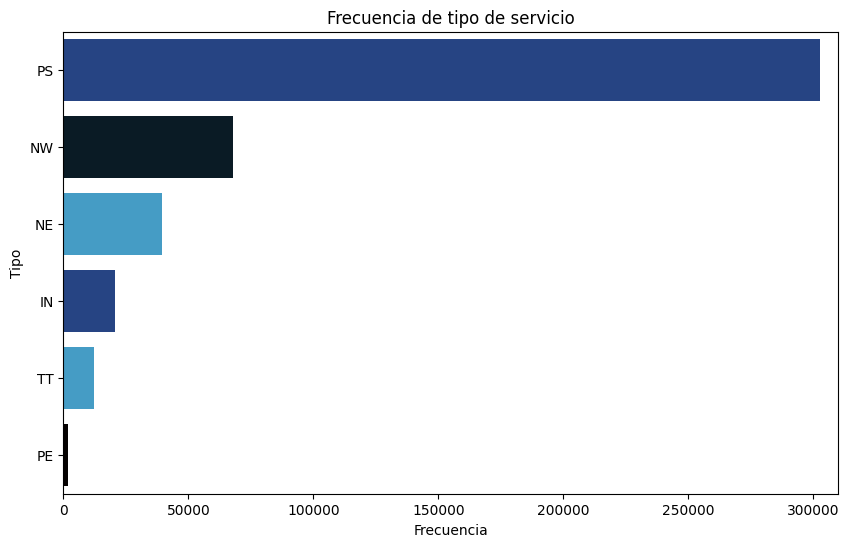

In [340]:
# Paleta de colores
colors = ['#163E93','#30A3DA','#051C2A','#060200','#163E93','#30A3DA']

# Contamos la cantidad para cada tipo
type_counts = df['tipo_de_servicio'].value_counts()

# Sort the types by frequency in descending order
type_order = type_counts.index

# Graficamos un barplot de Type
plt.figure(figsize=(10, 6))
sns.barplot(y=type_counts.index, x=type_counts.values, order=type_order, palette=colors, hue=type_counts.index, legend=False)
plt.xlim(0, 310000)  # Adjust the upper limit as needed
plt.title('Frecuencia de tipo de servicio')
plt.xlabel('Frecuencia')
plt.ylabel('Tipo')
plt.show()

# **FECHAS**

In [341]:
cantidad_unicos_date = df['fecha(a-m-d)'].nunique()
print(cantidad_unicos_date)

363


In [342]:
value_counts = df['fecha(a-m-d)'].value_counts()
value_counts

,count
fecha(a-m-d),
1999-05-23,3064
1999-07-04,2589
1999-08-01,2375
1999-08-02,2363
1999-08-03,2345
1999-03-11,2254
1999-11-02,2225
1999-12-12,2203
1999-12-30,2201


## Conversion a datatime de columna fecha

In [343]:
df['fecha(a-m-d)'] = pd.to_datetime(df['fecha(a-m-d)'])

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444443 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   fecha(a-m-d)              444443 non-null  datetime64[ns]
 1   CATEGORIA_CLIENTE         444443 non-null  object        
 2   ID_de_CLIENTE             444406 non-null  float64       
 3   ID_de_llamada             444443 non-null  int64         
 4   tipo_de_llamada           444443 non-null  category      
 5   prioridad                 444443 non-null  category      
 6   tipo_de_servicio          444443 non-null  category      
 7   SERVIDOR                  444443 non-null  category      
 8   Linea_VRU                 444443 non-null  object        
 9   hora_entrada_llamada      444443 non-null  object        
 10  hora_salida_llamada       444443 non-null  object        
 11  tiempo_espera_calc(seg)   444443 non-null  int64         
 12  hora_en

## Correccion de columnas con formato de horas

In [345]:
df['fecha(a-m-d)2'] = df['fecha(a-m-d)']
df['fecha(a-m-d)2'] = df['fecha(a-m-d)2'].dt.strftime('%Y-%m-%d')

In [346]:
df['hora_entrada_llamada'] = df['hora_entrada_llamada'].astype(str)
df['hora_entrada_llamada'] = pd.to_datetime(df['fecha(a-m-d)2'] + ' ' + df['hora_entrada_llamada'])

In [347]:
df['hora_salida_llamada'] = df['hora_salida_llamada'].astype(str)
df['hora_salida_llamada'] = pd.to_datetime(df['fecha(a-m-d)2'] + ' ' + df['hora_salida_llamada'])

In [348]:
df['hora_entrada_cola'] = df['hora_entrada_cola'].astype(str)
df['hora_entrada_cola'] = pd.to_datetime(df['fecha(a-m-d)2'] + ' ' + df['hora_entrada_cola'])

In [349]:
df['hora_salida_cola'] = df['hora_salida_cola'].astype(str)
df['hora_salida_cola'] = pd.to_datetime(df['fecha(a-m-d)2'] + ' ' + df['hora_salida_cola'])

In [350]:
df['hora_ent_servicio'] = df['hora_ent_servicio'].astype(str)
df['hora_ent_servicio'] = pd.to_datetime(df['fecha(a-m-d)2'] + ' ' + df['hora_ent_servicio'])

In [351]:
df['hora_sal_servicio'] = df['hora_sal_servicio'].astype(str)
df['hora_sal_servicio'] = pd.to_datetime(df['fecha(a-m-d)2'] + ' ' + df['hora_sal_servicio'])

## Eliminacion de columna fecha(a-m-d)2

In [352]:
df.drop('fecha(a-m-d)2',axis=1,inplace=True)

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444443 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   fecha(a-m-d)              444443 non-null  datetime64[ns]
 1   CATEGORIA_CLIENTE         444443 non-null  object        
 2   ID_de_CLIENTE             444406 non-null  float64       
 3   ID_de_llamada             444443 non-null  int64         
 4   tipo_de_llamada           444443 non-null  category      
 5   prioridad                 444443 non-null  category      
 6   tipo_de_servicio          444443 non-null  category      
 7   SERVIDOR                  444443 non-null  category      
 8   Linea_VRU                 444443 non-null  object        
 9   hora_entrada_llamada      444443 non-null  datetime64[ns]
 10  hora_salida_llamada       444443 non-null  datetime64[ns]
 11  tiempo_espera_calc(seg)   444443 non-null  int64         
 12  hora_en

In [354]:
df.head()

,fecha(a-m-d),CATEGORIA_CLIENTE,ID_de_CLIENTE,ID_de_llamada,tipo_de_llamada,prioridad,tipo_de_servicio,SERVIDOR,Linea_VRU,hora_entrada_llamada,hora_salida_llamada,tiempo_espera_calc(seg),hora_entrada_cola,hora_salida_cola,tiempo_cola_calc(seg),hora_ent_servicio,hora_sal_servicio,tiempo_de_serv_calc(seg)
0,1999-01-01,CLIENTE_CON_ID,9664491.0,33116,HANG,2,PS,NO_SERVER,AA0101,1999-01-01 00:00:31,1999-01-01 00:00:36,5,1999-01-01 00:00:36,1999-01-01 00:03:09,153,1999-01-01 00:00:00,1999-01-01 00:00:00,0
1,1999-01-01,CLIENTE_SIN_ID,0.0,33117,HANG,0,PS,NO_SERVER,AA0101,1999-01-01 00:34:12,1999-01-01 00:34:23,11,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01 00:00:00,1999-01-01 00:00:00,0
2,1999-01-01,CLIENTE_CON_ID,27997683.0,33118,AGENT,2,PS,MICHAL,AA0101,1999-01-01 06:55:20,1999-01-01 06:55:26,6,1999-01-01 06:55:26,1999-01-01 06:55:43,17,1999-01-01 06:55:43,1999-01-01 06:56:37,54
3,1999-01-01,CLIENTE_SIN_ID,0.0,33119,AGENT,0,PS,BASCH,AA0101,1999-01-01 07:41:16,1999-01-01 07:41:26,10,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01 07:41:25,1999-01-01 07:44:53,208
4,1999-01-01,CLIENTE_SIN_ID,0.0,33120,AGENT,0,PS,MICHAL,AA0101,1999-01-01 08:03:14,1999-01-01 08:03:24,10,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01 08:03:23,1999-01-01 08:05:10,107


# **SERVIDOR**

## Descripcion
* Nombre del agente que atendió la llamada.
* Este campo es NO_SERVER, si el servicio no fue provisto.

## Conteo

In [355]:
cantidad_unicos_server = df['SERVIDOR'].nunique()
print(cantidad_unicos_server)

53


## Desglose

In [356]:
value_counts = df['SERVIDOR'].value_counts()
value_counts

,count
SERVIDOR,
NO_SERVER,96506
SHARON,27492
STEREN,20500
AVNI,20111
MORIAH,19736
AVI,19455
KAZAV,18694
YITZ,17231
TOVA,17072


# **LINEA_VRU**

## Descripcion
* Hay 6 VRUs (AA01 AL AA06) con 16 lineas a asignar.
* Hay un total de 65 lineas
* Cada llamada es asignada a un numero de VRU + un numero de linea

## Conteo

In [357]:
cantidad_unicos_lineaVRU = df['Linea_VRU'].nunique()
print(cantidad_unicos_lineaVRU)

30


## Desglose

In [358]:
value_counts = df['Linea_VRU'].value_counts()
value_counts

,count
Linea_VRU,
AA0209,21422
AA0202,21314
AA0206,21086
AA0213,20552
AA0205,20247
AA0203,20056
AA0214,19896
AA0210,19157
AA0204,19010


## Graficas

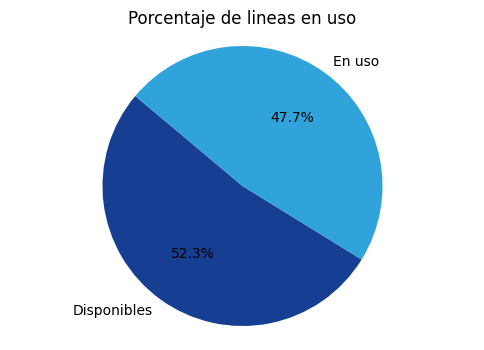

In [359]:
# Vamos a graficar un pie chart para evidenciar el grado de utilizacion de los vru
data = {'Status': ['Disponibles', 'En uso'],
        'Contar': [65 - 31, 31]}
df_vru = pd.DataFrame(data)

# Calculate the percentage of phone lines in use
df_vru['Porcentaje'] = (df_vru['Contar'] / df_vru['Contar'].sum()) * 100

# Define custom colors
colors = ['#163E93', '#30A3DA']

# Plot the pie chart with custom colors
plt.figure(figsize=(6, 4))
plt.pie(df_vru['Porcentaje'], labels=df_vru['Status'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Porcentaje de lineas en uso')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

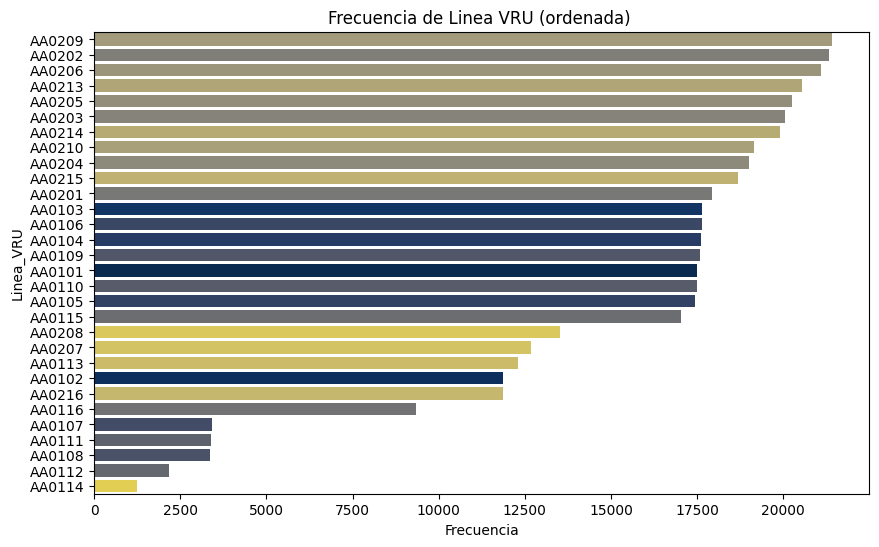

In [360]:
# Mostramos la utilizacion de las 31 vru que si se utilizan, se puede ver que el grado de utilizacion de las mismas no es homogeneo
plt.figure(figsize=(10, 6))
sns.countplot(y='Linea_VRU', data=df, order=df['Linea_VRU'].value_counts().index,hue='Linea_VRU',palette='cividis')
plt.title('Frecuencia de Linea VRU (ordenada) ')
plt.xlabel('Frecuencia')
plt.ylabel('Linea_VRU')
plt.show()

#**TIPO DE LLAMADA**

## Descripcion

Hay tres posibles salidas por cada llamada

1. **AGENT**: se dio servicio
2. **HANG**: se cortó la llamada y no se dió servicio
3. **PHANTOM**: una llamada en la que virtualmente se ignora lo que sucedió (afortunadamente son pocas llamadas en esta situación).


## Conteo

In [361]:
cantidad_unicos_outcome = df['tipo_de_llamada'].nunique() # method returns an array of unique values in the specified column.
print(cantidad_unicos_outcome)

3


## Desglose

In [362]:
# Agrupamos por cantidad para cada valor de la serie
value_counts = df['tipo_de_llamada'].value_counts()
value_counts

,count
tipo_de_llamada,
AGENT,353143
HANG,87701
PHANTOM,3599


## Graficas

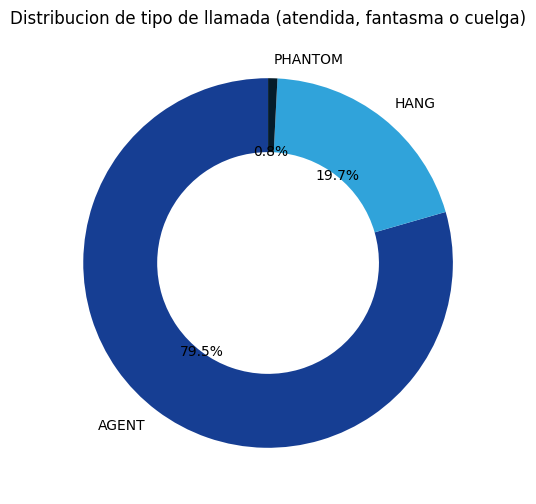

In [363]:
# Get the count of each priority
priority_counts = df['tipo_de_llamada'].value_counts()

# Paleta de colores
colors = ['#163E93','#30A3DA','#051C2A','#060200','#FFFFFF']
# Create a donut chart using the pie function with the custom colormap
plt.figure(figsize=(6, 6))
plt.pie(priority_counts, labels=priority_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=colors)
plt.title('Distribucion de tipo de llamada (atendida, fantasma o cuelga)')
plt.show()

#**PRIORIDAD**

## Descripcion

**ALTA 2**

indica clientes de Alta Prioridad.
A los clientes de Alta Prioridad se les asigna un tiempo de espera de 1.5 minutos al comienzo de su llamada (esto les permite avanzar en la posición de la cola de llamadas).
También están exentos de pagar un fee mensual, que los clientes regulares deben pagar.

**REGULAR 1**

identifican a las llamadas de los clientes regulares
Hay clientes con prioridad 0, pero son tratados como si fueran de prioridad 1
Se definió que los clientes con prioridad 0 corresponden a clientes de prioridad 1 que no realizaron Upgrade a Alta Prioridad (prioridad 2).
Debido a un error en el sistema, el cliente I.D. no fue registrado para aquellos que no esperaron en la cola, Por lo tanto, su prioridad es 0.


**REGULAR 0**

identifican a clientes sin identificar



## Conteo

In [364]:
cantidad_unicos_prioridad = df['prioridad'].nunique() # method returns an array of unique values in the specified column.
print(cantidad_unicos_prioridad )

3


## Desglose

In [365]:
# Agrupamos por cantidad para cada valor de la serie
value_counts = df['prioridad'].value_counts()
value_counts

,count
prioridad,
0,235163
2,137453
1,71827


## Graficas

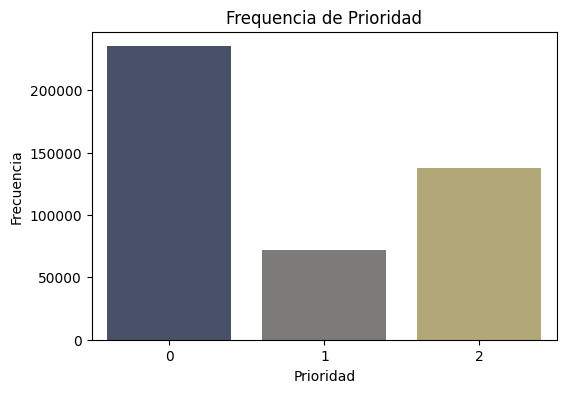

In [366]:
# Graficamos la distribucion de prioridades
unique_priorities = df['prioridad'].unique()

# Use a palette with the same number of colors as unique priorities
palette = sns.color_palette('cividis', len(unique_priorities))

# Plot the countplot with the adjusted palette
plt.figure(figsize=(6, 4))
sns.countplot(x='prioridad', data=df, hue='prioridad', palette='cividis', legend=False)
plt.title('Frequencia de Prioridad')
plt.xlabel('Prioridad')
plt.ylabel('Frecuencia')
plt.show()

In [367]:
df.head(5)

,fecha(a-m-d),CATEGORIA_CLIENTE,ID_de_CLIENTE,ID_de_llamada,tipo_de_llamada,prioridad,tipo_de_servicio,SERVIDOR,Linea_VRU,hora_entrada_llamada,hora_salida_llamada,tiempo_espera_calc(seg),hora_entrada_cola,hora_salida_cola,tiempo_cola_calc(seg),hora_ent_servicio,hora_sal_servicio,tiempo_de_serv_calc(seg)
0,1999-01-01,CLIENTE_CON_ID,9664491.0,33116,HANG,2,PS,NO_SERVER,AA0101,1999-01-01 00:00:31,1999-01-01 00:00:36,5,1999-01-01 00:00:36,1999-01-01 00:03:09,153,1999-01-01 00:00:00,1999-01-01 00:00:00,0
1,1999-01-01,CLIENTE_SIN_ID,0.0,33117,HANG,0,PS,NO_SERVER,AA0101,1999-01-01 00:34:12,1999-01-01 00:34:23,11,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01 00:00:00,1999-01-01 00:00:00,0
2,1999-01-01,CLIENTE_CON_ID,27997683.0,33118,AGENT,2,PS,MICHAL,AA0101,1999-01-01 06:55:20,1999-01-01 06:55:26,6,1999-01-01 06:55:26,1999-01-01 06:55:43,17,1999-01-01 06:55:43,1999-01-01 06:56:37,54
3,1999-01-01,CLIENTE_SIN_ID,0.0,33119,AGENT,0,PS,BASCH,AA0101,1999-01-01 07:41:16,1999-01-01 07:41:26,10,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01 07:41:25,1999-01-01 07:44:53,208
4,1999-01-01,CLIENTE_SIN_ID,0.0,33120,AGENT,0,PS,MICHAL,AA0101,1999-01-01 08:03:14,1999-01-01 08:03:24,10,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01 08:03:23,1999-01-01 08:05:10,107


# **CALCULOS**

## Edicion de la columna fecha, nueva columna

In [368]:
# Se agrega una nueva columna para el mes
df['mes'] = df['fecha(a-m-d)'].dt.month
df['mes'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [369]:
# Se agrega una nueva columna para el dia
df['dia'] = df['fecha(a-m-d)'].dt.day
df['dia'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 11, 12],
      dtype=int32)

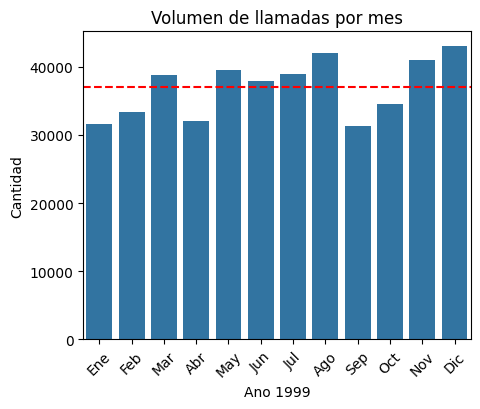

In [370]:
# Calculamos el promedio de llamadas por mes (linea roja)
average_calls_per_month = df['mes'].value_counts().mean()
# Se grafica el volumne de llamadas por mes
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='mes')
# Paleta de colores
colors = ['#163E93','#30A3DA','#051C2A','#060200','#FFFFFF']
# ajustamos las x-axis para mostrar los valores de los meses
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.xticks(ticks=range(12), labels=meses, rotation=45) # Pass the list 'meses' as labels
plt.axhline(y=average_calls_per_month, color='red', linestyle='--', label='Average Calls')
plt.xlabel('Ano 1999')
plt.ylabel('Cantidad')
plt.title('Volumen de llamadas por mes')
plt.show()

<Figure size 1500x800 with 0 Axes>

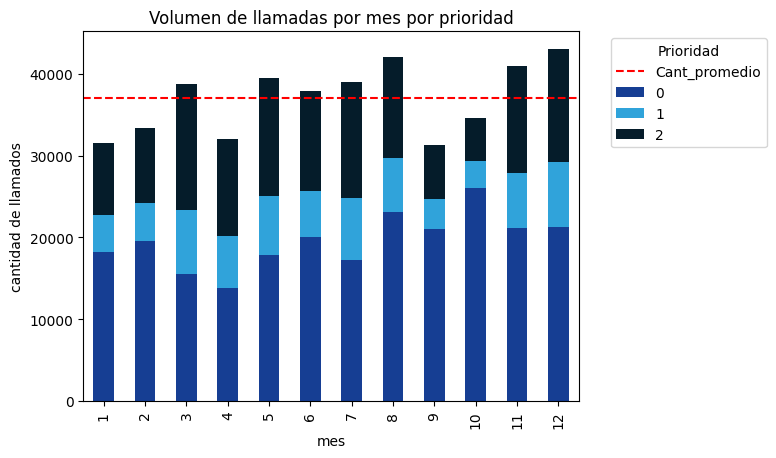

In [371]:
# Agrupamos por mes y prioridad para despues contar el numero de registros
df_counts = df.groupby(['mes', 'prioridad'],observed=True).size().unstack().fillna(0)

# Calculmos la cantidad de llamadas promedio por mes
average_calls = df.groupby('mes').size().mean()

# Paleta de colores
colors = ['#163E93','#30A3DA','#051C2A','#060200','#FFFFFF']

# Creamos un grafico de columnas apiladas
plt.figure(figsize=(15, 8))
df_counts.plot(kind='bar', stacked=True, color=colors)
plt.title('Volumen de llamadas por mes por prioridad')
plt.xlabel('mes')
plt.ylabel('cantidad de llamados')
plt.axhline(y=average_calls, color='red', linestyle='--', label='Cant_promedio')
plt.legend(title='Prioridad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [372]:
df

,fecha(a-m-d),CATEGORIA_CLIENTE,ID_de_CLIENTE,ID_de_llamada,tipo_de_llamada,prioridad,tipo_de_servicio,SERVIDOR,Linea_VRU,hora_entrada_llamada,hora_salida_llamada,tiempo_espera_calc(seg),hora_entrada_cola,hora_salida_cola,tiempo_cola_calc(seg),hora_ent_servicio,hora_sal_servicio,tiempo_de_serv_calc(seg),mes,dia
0,1999-01-01,CLIENTE_CON_ID,9664491.0,33116,HANG,2,PS,NO_SERVER,AA0101,1999-01-01 00:00:31,1999-01-01 00:00:36,5,1999-01-01 00:00:36,1999-01-01 00:03:09,153,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1,1
1,1999-01-01,CLIENTE_SIN_ID,0.0,33117,HANG,0,PS,NO_SERVER,AA0101,1999-01-01 00:34:12,1999-01-01 00:34:23,11,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1,1
2,1999-01-01,CLIENTE_CON_ID,27997683.0,33118,AGENT,2,PS,MICHAL,AA0101,1999-01-01 06:55:20,1999-01-01 06:55:26,6,1999-01-01 06:55:26,1999-01-01 06:55:43,17,1999-01-01 06:55:43,1999-01-01 06:56:37,54,1,1
3,1999-01-01,CLIENTE_SIN_ID,0.0,33119,AGENT,0,PS,BASCH,AA0101,1999-01-01 07:41:16,1999-01-01 07:41:26,10,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01 07:41:25,1999-01-01 07:44:53,208,1,1
4,1999-01-01,CLIENTE_SIN_ID,0.0,33120,AGENT,0,PS,MICHAL,AA0101,1999-01-01 08:03:14,1999-01-01 08:03:24,10,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01 08:03:23,1999-01-01 08:05:10,107,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444443,1999-12-31,CLIENTE_SIN_ID,0.0,17211,AGENT,0,IN,Z2ELINOR,AA0216,1999-12-31 13:46:51,1999-12-31 13:47:04,13,1999-12-31 00:00:00,1999-12-31 00:00:00,0,1999-12-31 13:47:03,1999-12-31 13:56:16,553,12,31
444444,1999-12-31,CLIENTE_SIN_ID,0.0,17212,HANG,0,IN,NO_SERVER,AA0216,1999-12-31 13:58:31,1999-12-31 13:58:40,9,1999-12-31 13:58:40,1999-12-31 13:59:49,69,1999-12-31 00:00:00,1999-12-31 00:00:00,0,12,31
444445,1999-12-31,CLIENTE_SIN_ID,0.0,17213,HANG,0,IN,NO_SERVER,AA0216,1999-12-31 17:10:51,1999-12-31 17:11:12,21,1999-12-31 00:00:00,1999-12-31 00:00:00,0,1999-12-31 00:00:00,1999-12-31 00:00:00,0,12,31
444446,1999-12-31,CLIENTE_SIN_ID,0.0,17214,HANG,0,IN,NO_SERVER,AA0216,1999-12-31 18:30:19,1999-12-31 18:30:54,35,1999-12-31 00:00:00,1999-12-31 00:00:00,0,1999-12-31 00:00:00,1999-12-31 00:00:00,0,12,31


## *Distribucion de llamadas por mes*

In [373]:
# b. Calculamos la distribucion de llamadas por mes
distribution_calls_mes = df.groupby('mes').size()

distribution_calls_mes.describe()

,0
count,12.000000
mean,37036.916667
std,4242.360909
min,31370.000000
25%,33016.750000
50%,38368.000000
75%,39919.500000
max,43065.000000


* El promedio de llamadas recibidas por mes es de 37.036 llamadas y con un desvio estandar de 4.242 llamadas.


In [374]:
df['mes'].value_counts().mean()

37036.916666666664

* El mes que mas llamadas se registraron fue Diciembre con un total 43.065 llamadas




In [375]:
max=df['mes'].value_counts().max()
max

43065

* El mes que menos llamadas registro fue Septiembre con un total de 31.370 llamadas

In [376]:
min=df['mes'].value_counts().min()
min

31370

* La amplitud es de 11.695 llamadas.

In [377]:
amplitud=max-min
amplitud

11695

* Los meses de enero, abril y septiembre se registraron bajas en la cantidad de llamadas.

In [378]:
top_4_values = df['mes'].value_counts().nsmallest(4)
top_4_values

,count
mes,
9,31370
1,31597
4,32035
2,33344


* Siendo los meses de Agosto, Noviembre y Diciembre el pico de llamadas.

In [379]:
top_4_values = df['mes'].value_counts().nlargest(3)
top_4_values

,count
mes,
12,43065
8,42078
11,41019


##Distribucion de las llamadas por dia

In [380]:
# a. Calculamos la distribucion de llamadas por dia
llamadas_por_dia_lu_a_dom_df = df.groupby(df['fecha(a-m-d)'].dt.date).size()
llamadas_por_dia_lu_a_dom_df.describe()

,0
count,363.000000
mean,1224.360882
std,642.844356
min,14.000000
25%,546.000000
50%,1443.000000
75%,1713.000000
max,3064.000000


## Graficas lunes a Domingo

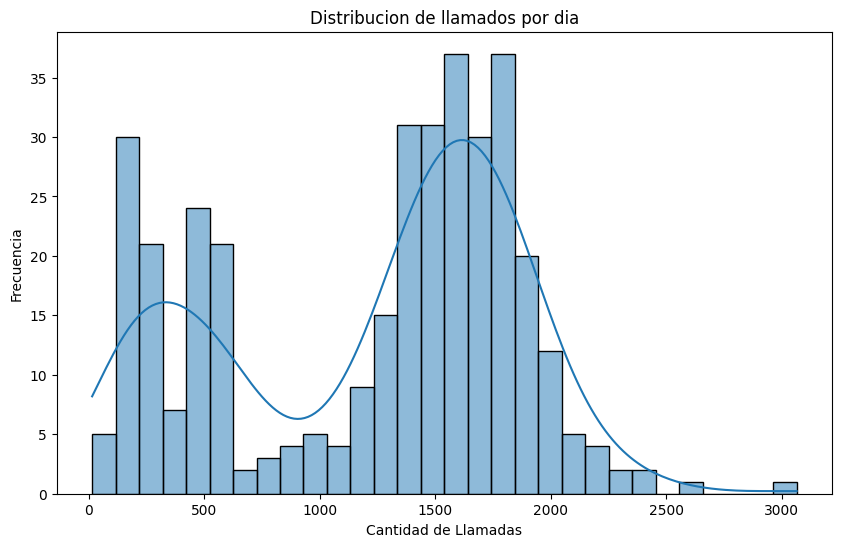

In [381]:
# Graficamos la informacion
plt.figure(figsize=(10, 6))
sns.histplot(llamadas_por_dia_lu_a_dom_df, bins=30, kde=True)
plt.title('Distribucion de llamados por dia')
plt.xlabel('Cantidad de Llamadas')
plt.ylabel('Frecuencia')
plt.show()

In [382]:
llamadas_por_dia_lu_a_dom_df.describe()

,0
count,363.000000
mean,1224.360882
std,642.844356
min,14.000000
25%,546.000000
50%,1443.000000
75%,1713.000000
max,3064.000000


## Distribucion llamadas lunes a jueves

### Lunes a domingo

In [383]:
# a. Calculamos la distribucion de llamadas por dia
llamadas_por_dia_lu_a_dom_df = df.groupby(df['fecha(a-m-d)'].dt.date).size()
llamadas_por_dia_lu_a_dom_df.describe()

,0
count,363.000000
mean,1224.360882
std,642.844356
min,14.000000
25%,546.000000
50%,1443.000000
75%,1713.000000
max,3064.000000


### Lunes a jueves

In [384]:
# Excluimos los dias Viernes, Sabado y Domingo (0=Monday, 1=Tuesday, ..., 6=Sunday)
lunes_a_jueves_df = df[df['fecha(a-m-d)'].dt.dayofweek < 4]
llamadas_por_dia_lu_a_jue = lunes_a_jueves_df.groupby(lunes_a_jueves_df['fecha(a-m-d)'].dt.date).size()
llamadas_por_dia_lu_a_jue.describe()


,0
count,206.000000
mean,1544.902913
std,367.643438
min,89.000000
25%,1387.750000
50%,1567.000000
75%,1779.000000
max,2363.000000


### Viernes a Domingo

In [385]:
viernes_a_domingo_df = df[df['fecha(a-m-d)'].dt.dayofweek >= 4]
viernes_a_domingo_df = viernes_a_domingo_df.groupby(viernes_a_domingo_df['fecha(a-m-d)'].dt.date).size()
viernes_a_domingo_df.describe()

,0
count,157.000000
mean,803.777070
std,683.834275
min,14.000000
25%,233.000000
50%,509.000000
75%,1519.000000
max,3064.000000


## Graficas lunes a jueves

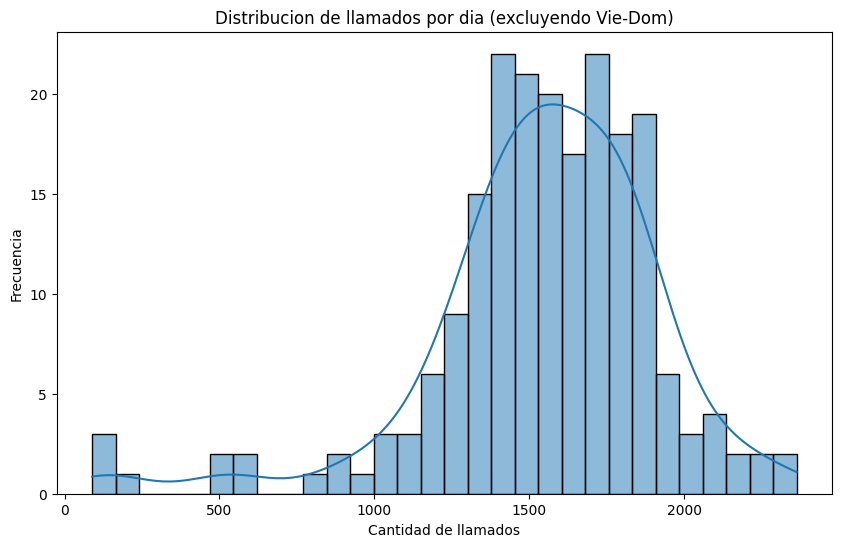

In [386]:
# Graficamos
plt.figure(figsize=(10, 6))
sns.histplot(llamadas_por_dia_lu_a_jue, bins=30, kde=True)
plt.title('Distribucion de llamados por dia (excluyendo Vie-Dom)')
plt.xlabel('Cantidad de llamados')
plt.ylabel('Frecuencia')
plt.show()

## Comparacion lunes jueves - lunes domingo - viernes domingo

In [387]:
# Create DataFrames for descriptive statistics
df_lu_a_jue_desc = llamadas_por_dia_lu_a_jue.describe()
df_vi_a_dom_df = viernes_a_domingo_df.describe()
df_lu_a_dom_desc = llamadas_por_dia_lu_a_dom_df.describe()

# Concatenate the two DataFrames vertically to compare
df_comparison = pd.concat([df_lu_a_jue_desc, df_vi_a_dom_df,df_lu_a_dom_desc], axis=1)
df_comparison.columns = ['Lunes a Jueves', 'Viernes a Domingo','Lunes a Domingo']

# Display the pivot table
print(df_comparison)

       Lunes a Jueves  Viernes a Domingo  Lunes a Domingo
count      206.000000         157.000000       363.000000
mean      1544.902913         803.777070      1224.360882
std        367.643438         683.834275       642.844356
min         89.000000          14.000000        14.000000
25%       1387.750000         233.000000       546.000000
50%       1567.000000         509.000000      1443.000000
75%       1779.000000        1519.000000      1713.000000
max       2363.000000        3064.000000      3064.000000


## Distribución de llamadas por hora (lunes a jueves)

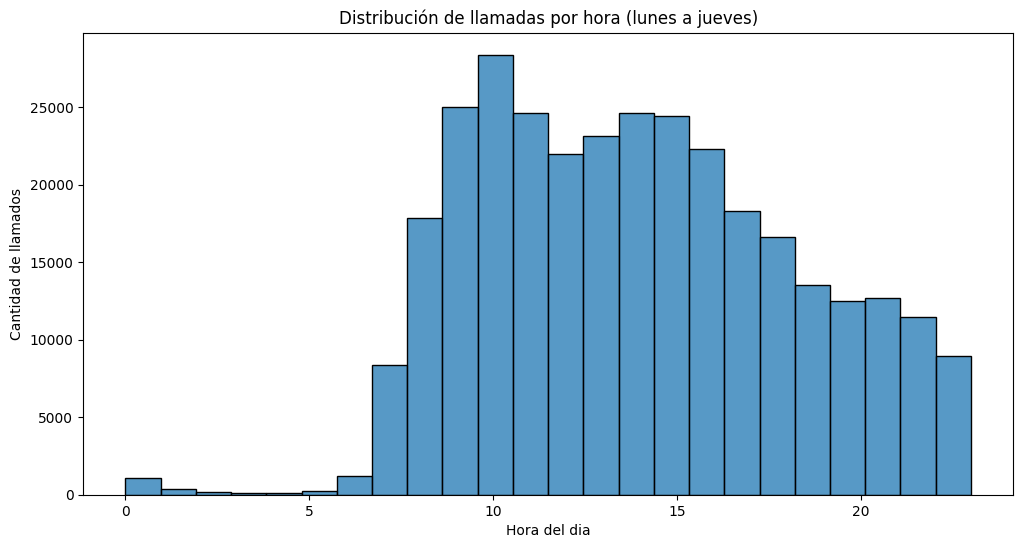

In [388]:
# Filtramos de Lunes a Jueves nuevamente
weekday_df = df[(df['fecha(a-m-d)'].dt.dayofweek >= 0) & (df['fecha(a-m-d)'].dt.dayofweek <= 3)].copy()

# Extraemos la hora de 'vru_entry'
weekday_df['hour'] = weekday_df['hora_entrada_llamada'].dt.hour

# b. Calculamos la distribucion de las llamadas ingresadas por hora
distribution_calls_per_hour = weekday_df.groupby('hour').size()

# Plot histogram
plt.figure(figsize=(12, 6))
sns.histplot(weekday_df['hour'], bins=24, kde=False)
plt.title('Distribución de llamadas por hora (lunes a jueves)')
plt.xlabel('Hora del dia')
plt.ylabel('Cantidad de llamados')
plt.show()

In [389]:
distribution_calls_per_hour.describe()

,0
count,24.000000
mean,13260.416667
std,9905.542366
min,99.000000
25%,1189.000000
50%,13103.000000
75%,22511.500000
max,28393.000000


In [390]:
# creamos una tabla pivot para poder ver la distribucion de llamadas por hora por dia
pivot_table = weekday_df.pivot_table(index='hour', columns=weekday_df['fecha(a-m-d)'].dt.dayofweek, aggfunc='size')

# Renombramos las columnas
day_names = ['Lunes', 'Martes', 'Miercoles', 'Jueves']
pivot_table.columns = day_names

# Display the pivot table
pivot_table

,Lunes,Martes,Miercoles,Jueves
hour,,,,
0,267,267,253,273
1,112,87,102,77
2,49,55,46,51
3,28,19,34,18
4,23,24,34,26
5,78,68,54,56
6,364,285,306,277
7,2466,1987,1951,1982
8,4547,4511,4434,4383


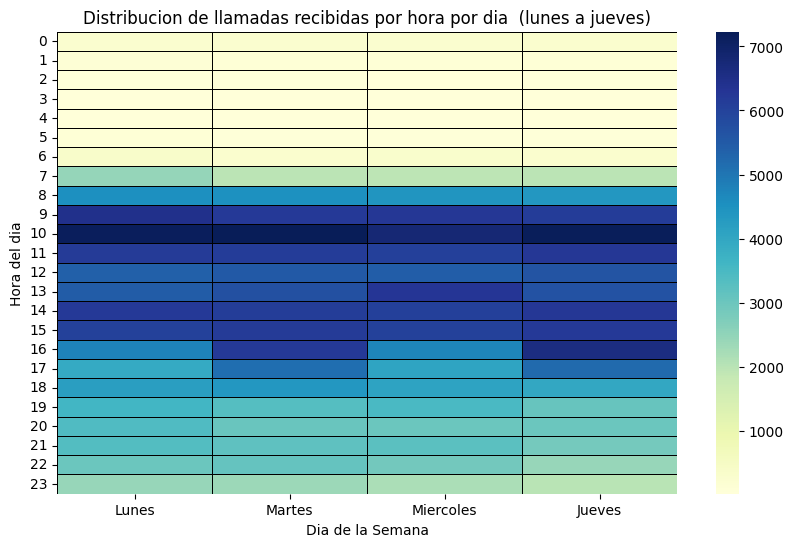

In [391]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=0.5, linecolor='black')
plt.title('Distribucion de llamadas recibidas por hora por dia  (lunes a jueves)')
plt.xlabel('Dia de la Semana')
plt.ylabel('Hora del dia')
plt.yticks(rotation=0)
plt.show()

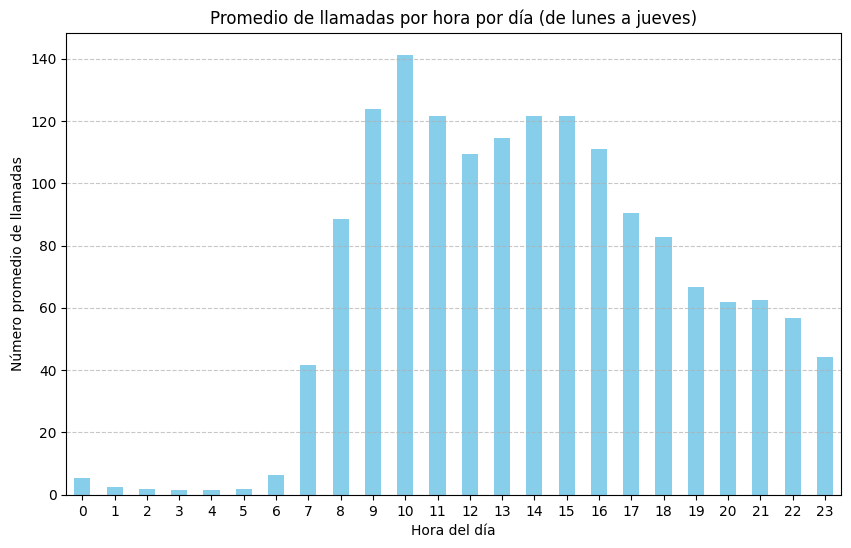

In [392]:
# Calculate the average number of calls per hour per day
average_calls_per_hour_per_day = weekday_df.groupby(['fecha(a-m-d)', 'hour']).size().groupby('hour').mean()

# Plot the average calls per hour per day
plt.figure(figsize=(10, 6))
average_calls_per_hour_per_day.plot(kind='bar', color='skyblue')
plt.title('Promedio de llamadas por hora por día (de lunes a jueves)')
plt.xlabel('Hora del día')
plt.ylabel('Número promedio de llamadas')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Conclusiones llamadas diarias

* El maximo de llamadas por hora que se ha registrado es de 141 llamadas en la misma hora
* El minimo de llamadas recibidas en una hora es de 2 llamadas
* El promedio de llamadas por hora es de 65 llamadas.
* El 75% de las veces se reciben menos de 111 llamadas por hora

In [393]:
# b. Calculamos la distribucion de las llamadas ingresadas por hora
distribution_calls_per_hour.describe()

,0
count,24.000000
mean,13260.416667
std,9905.542366
min,99.000000
25%,1189.000000
50%,13103.000000
75%,22511.500000
max,28393.000000


In [394]:
# Filtramos de Lunes a Jueves nuevamente
weekday_df = df[(df['fecha(a-m-d)'].dt.dayofweek >= 0) & (df['fecha(a-m-d)'].dt.dayofweek <= 3)].copy()

In [395]:
# Extraemos la hora de 'vru_exit'
weekday_df['hour'] = weekday_df['hora_salida_llamada'].dt.hour

In [396]:
# b. Calculamos la distribucion de las llamadas ingresadas por hora
distribution_calls_per_hour = weekday_df.groupby('hour').size()


In [397]:
# a. Calculamos el maximo de llamadas ingresadas por hora
max_per_hour = distribution_calls_per_hour.max()

In [398]:
# el valor maximo se registro en la hora
max_hour = distribution_calls_per_hour.idxmax()

In [399]:
# Visualizamos la informacion
print(f"La hora con mayor cantidad de llamadas ingresadas fue: {max_hour} horas con {max_per_hour} llamadas")

La hora con mayor cantidad de llamadas ingresadas fue: 10 horas con 28397 llamadas


In [400]:
# a. Calculamos el minimo de llamadas ingresadas por hora
min_per_hour = distribution_calls_per_hour.min()

In [401]:
# el valor maximo se registro en la hora
min_hour = distribution_calls_per_hour.idxmin()

In [402]:
# Visualizamos la informacion
print(f"La hora con menor cantidad de llamadas ingresadas fue: {min_hour} con {min_per_hour} llamadas")

La hora con menor cantidad de llamadas ingresadas fue: 3 con 101 llamadas


In [403]:
# Agrupamos por hora y calculamos el promedio de llamadas
average_calls_per_hour = weekday_df.groupby('hour').size().mean()

## Grafica Promedio de llamadas por hora

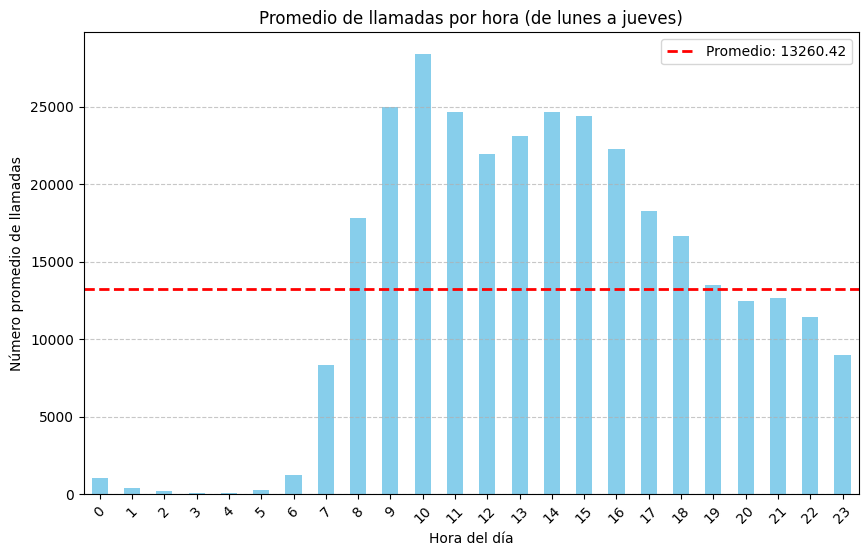

In [404]:
# Graficamos el promedio de llamadas por hora
plt.figure(figsize=(10, 6))
weekday_df.groupby('hour').size().plot(kind='bar', color='skyblue')
plt.title('Promedio de llamadas por hora (de lunes a jueves)')
plt.xlabel('Hora del día')
plt.ylabel('Número promedio de llamadas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(average_calls_per_hour, color='red', linestyle='--', linewidth=2, label=f'Promedio: {average_calls_per_hour:.2f}')
plt.legend()
plt.show()

## Tiempo de espera calculado (vru time)

In [405]:
df['tiempo_espera_calc(seg)'].describe()

,tiempo_espera_calc(seg)
count,444443.000000
mean,10.285917
std,34.942273
min,-362.000000
25%,6.000000
50%,8.000000
75%,10.000000
max,4832.000000


In [406]:
# Se cuentan los valores negativos
neg_count = (df['tiempo_espera_calc(seg)'] < 0).sum()
perc_neg = round(neg_count/df['tiempo_espera_calc(seg)'].count()*100, 2)
print('Cantidad de valores negativos: ', neg_count)
print('Porcentaje sobre el total:', perc_neg, '%')

Cantidad de valores negativos:  350
Porcentaje sobre el total: 0.08 %


In [407]:
df.head(5)

,fecha(a-m-d),CATEGORIA_CLIENTE,ID_de_CLIENTE,ID_de_llamada,tipo_de_llamada,prioridad,tipo_de_servicio,SERVIDOR,Linea_VRU,hora_entrada_llamada,hora_salida_llamada,tiempo_espera_calc(seg),hora_entrada_cola,hora_salida_cola,tiempo_cola_calc(seg),hora_ent_servicio,hora_sal_servicio,tiempo_de_serv_calc(seg),mes,dia
0,1999-01-01,CLIENTE_CON_ID,9664491.0,33116,HANG,2,PS,NO_SERVER,AA0101,1999-01-01 00:00:31,1999-01-01 00:00:36,5,1999-01-01 00:00:36,1999-01-01 00:03:09,153,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1,1
1,1999-01-01,CLIENTE_SIN_ID,0.0,33117,HANG,0,PS,NO_SERVER,AA0101,1999-01-01 00:34:12,1999-01-01 00:34:23,11,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1,1
2,1999-01-01,CLIENTE_CON_ID,27997683.0,33118,AGENT,2,PS,MICHAL,AA0101,1999-01-01 06:55:20,1999-01-01 06:55:26,6,1999-01-01 06:55:26,1999-01-01 06:55:43,17,1999-01-01 06:55:43,1999-01-01 06:56:37,54,1,1
3,1999-01-01,CLIENTE_SIN_ID,0.0,33119,AGENT,0,PS,BASCH,AA0101,1999-01-01 07:41:16,1999-01-01 07:41:26,10,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01 07:41:25,1999-01-01 07:44:53,208,1,1
4,1999-01-01,CLIENTE_SIN_ID,0.0,33120,AGENT,0,PS,MICHAL,AA0101,1999-01-01 08:03:14,1999-01-01 08:03:24,10,1999-01-01 00:00:00,1999-01-01 00:00:00,0,1999-01-01 08:03:23,1999-01-01 08:05:10,107,1,1


In [408]:
# Revisando los datos parecerían estar invertidos los datos de vru_entry y vru_exit.
# Se crean nuevas columnas donde se corrigen estas horas y se recalculan los tiempos de espera.

df['hora_entrada_llamada_corr'] = np.where(df['hora_entrada_llamada'] > df['hora_salida_llamada'], df['hora_salida_llamada'], df['hora_entrada_llamada'])
df['hora_salida_llamada_corr'] = np.where(df['hora_entrada_llamada'] > df['hora_salida_llamada'], df['hora_entrada_llamada'], df['hora_salida_llamada'])
df['tiempo_espera_calc(seg)_corr'] = (df['hora_salida_llamada_corr'] - df['hora_entrada_llamada_corr']).dt.total_seconds()
df['tiempo_espera_calc(seg)_corr'] = df['tiempo_espera_calc(seg)_corr'].astype('int64')



In [409]:
# Se verifican los cambios
df['tiempo_espera_calc(seg)_corr'].describe()


,tiempo_espera_calc(seg)_corr
count,444443.000000
mean,10.396195
std,34.909622
min,0.000000
25%,6.000000
50%,8.000000
75%,10.000000
max,4832.000000


In [410]:
# copiamos la columna vru_time_corr en vru_time y luego eliminamos la columna vru_time_corr:
df['tiempo_espera_calc(seg)'] = df['tiempo_espera_calc(seg)_corr']
df.drop('tiempo_espera_calc(seg)_corr',axis=1,inplace=True)

## Box plot de tiempo de espera calculado

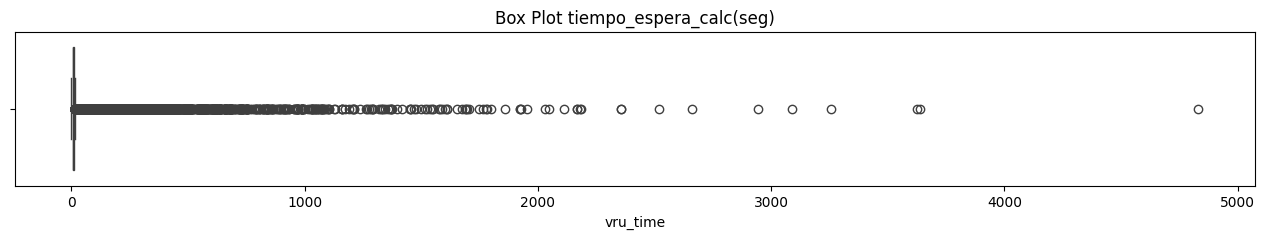

In [411]:
# Create a box plot
plt.figure(figsize=(16, 2))
sns.boxplot(x=df['tiempo_espera_calc(seg)'])
plt.title('Box Plot tiempo_espera_calc(seg)')
plt.xlabel('vru_time')
plt.show()

## Box plot strip de tiempo de espera calculado

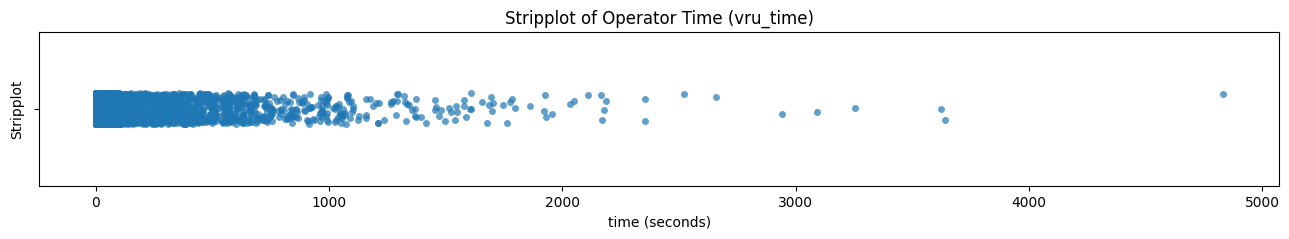

In [412]:
# Create a strip plot
plt.figure(figsize=(16, 2))
sns.stripplot(data=df, x='tiempo_espera_calc(seg)', jitter=True, alpha=0.7)
plt.xlabel('time (seconds)')
plt.ylabel('Stripplot')
plt.title('Stripplot of Operator Time (vru_time)')
plt.show()

In [413]:
outlier_count = (df['tiempo_espera_calc(seg)'] > 16).sum()
perc_outlier = round(outlier_count/df['tiempo_espera_calc(seg)'].count()*100,2)
print('Cantidad de valores outlier sobre 16 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 16 segundos:  26651
Porcentaje sobre el total: 6.0 %


In [414]:
outlier_count = (df['tiempo_espera_calc(seg)'] > 1000).sum()
perc_outlier = round(outlier_count/df['tiempo_espera_calc(seg)'].count()*100,2)
print('Cantidad de valores outlier sobre 1000 segundos: ', outlier_count)
print('Porcentaje sobre el total:', perc_outlier, '%')

Cantidad de valores outlier sobre 1000 segundos:  110
Porcentaje sobre el total: 0.02 %


## Conclusiones outliers

* Los tiempos entre que una llamada es recepcionada y asignada al VRU correspondiente tiene una duracion promedio de 10 segundos.

* El valor maximo es de unos 4832 segundos (80 minutos).

* El valor minimo es 0 segundos

* El 75% de las llamadas son enviadas a cola en menos de 10 segundos. Esto es 333.250 llamados.

* Analizando las graficas de los Boxplots y la dispersion y los calculos de los outliers vemos que:

* hay 26.333 llamadas con tiempos mayores a los 16 segundos, representando alrededor del 6% de todos los registros. Estos registros podrian ser considerados atipicos o desvios.
* Tiempos entre los 16 segundos y hasta 1000 segundos (aproximadamente 16 minutos), se considerarian normales.
* De esta forma, podriamos clasificar como outliers solamente 110 llamadas, que representan el 0.02% del total de los llamados recibidos.
procedemos a eliminar estos registros.

## Distribución de tiempos de espera


In [415]:
df = df[df['tiempo_espera_calc(seg)'] <=1000]
(df['tiempo_espera_calc(seg)'] > 1000).sum()

0

In [416]:
df['tiempo_espera_calc(seg)'].describe()

,tiempo_espera_calc(seg)
count,444333.000000
mean,10.013888
std,23.049743
min,0.000000
25%,6.000000
50%,8.000000
75%,10.000000
max,997.000000


In [417]:
# Mostrar distribución de frecuencia
frequency_distribution = df['tiempo_espera_calc(seg)'].value_counts().sort_index()
print("Distribución de frecuencia de tiempo espera")
print(frequency_distribution)
# Filtrar llamadas con tiempo de cola calc(seg) == 0
valid_calls = df[df['tiempo_espera_calc(seg)'] > 0]


Distribución de frecuencia de tiempo espera
tiempo_espera_calc(seg)
0      8696
1      1708
2      6568
3      1797
4      1934
       ... 
990       3
991       1
995       1
996       1
997       1
Name: count, Length: 648, dtype: int64


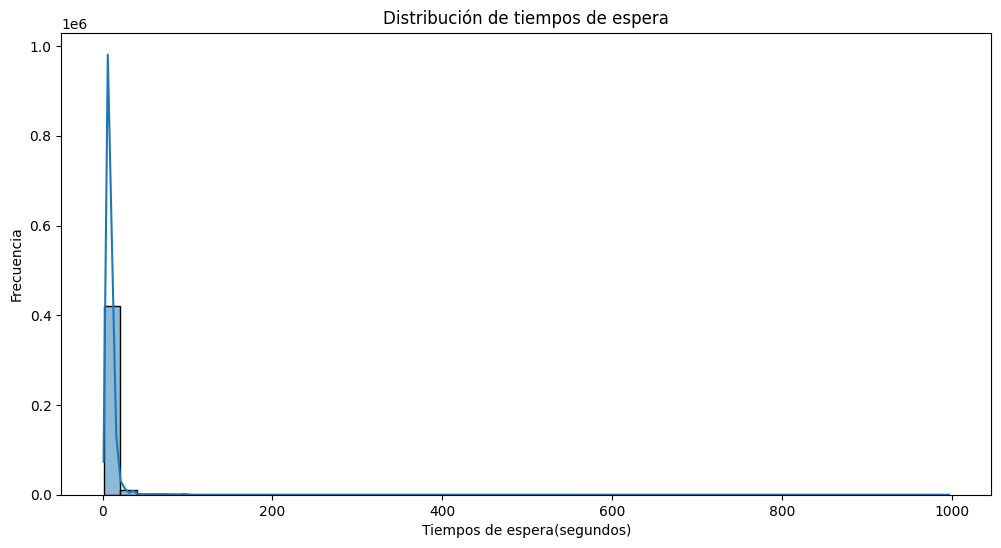

In [418]:
# Plot the histogram
plt.figure(figsize=(12, 6))
sns.histplot(valid_calls['tiempo_espera_calc(seg)'], bins=50, kde=True)
plt.title('Distribución de tiempos de espera')
plt.xlabel('Tiempos de espera(segundos)')
plt.ylabel('Frecuencia')
plt.show()

hora_entrada_cola' (q_start) y  hora_salida_cola (q_exitq_start)


Vamos a analizar estas dos variables juntas, ya que como vimos en la variable anterior (vru_time) ambas estan relacionadas ya que ocurren en cascada.

Revisamos la distribución de los llamados por horario para detectar picos de demanda y relacionarla luego con los tiempos en cola y si tuvieran a su vez incidencia en el resutado (outcome) de la interaccion del cliente con el call center, o la tasa de abandono.

Empezaremos por analizar los datos en q_start:
Como es de esperarse, ya que lo anticipamos con el análisis del vru_entry, vru_exit y vru_time:

La cantidad máxima de llamadas recibidia se produce a las 10 hs y otro pico de demanda menor a las 15 hs
La hora con mayor cantidad de llamadas ingresadas fue: 10 hs
La hora con menor cantidad de llamadas ingresadas fue a las 15 hs

In [419]:
# Extraemos la hora de 'q_start' y de 'q_exit'
weekday_df['hora_entrada_cola'] = weekday_df['hora_entrada_cola'].dt.hour
weekday_df['hora_salida_cola'] = weekday_df['hora_salida_cola'].dt.hour


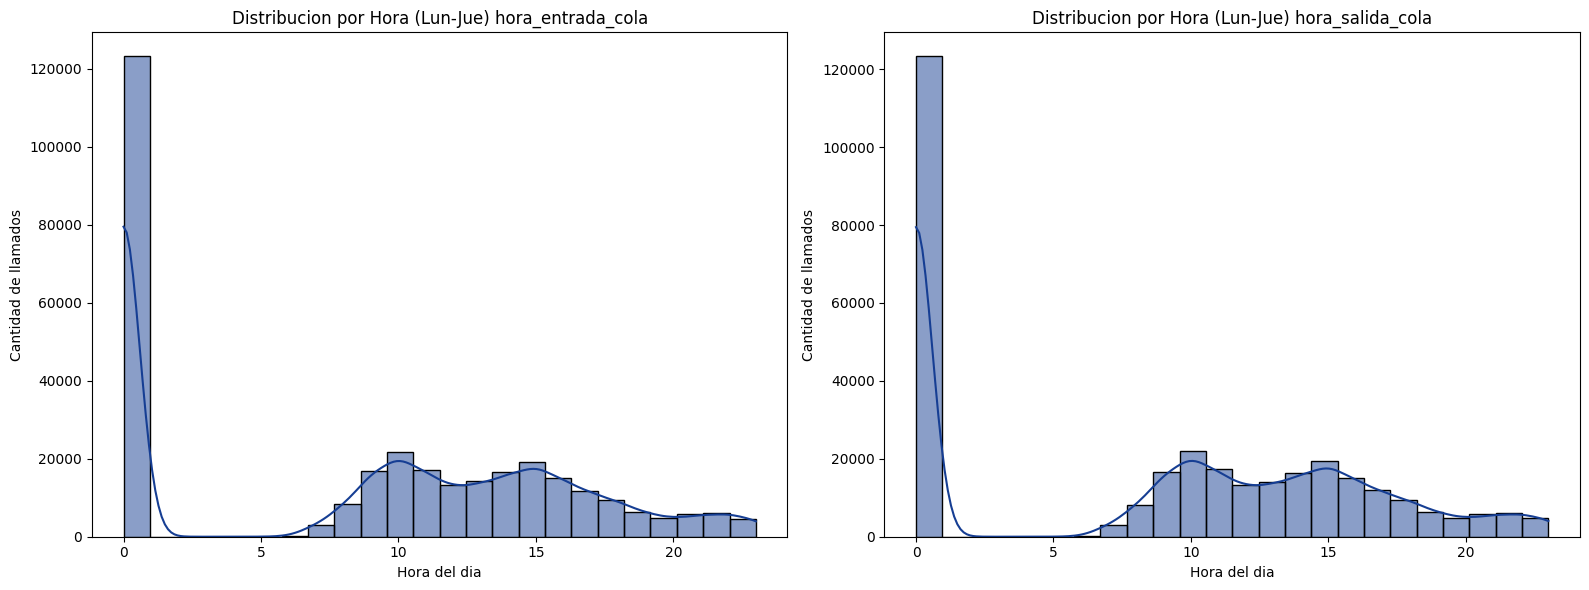

In [420]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the distribution of time at which calls enter the queue
sns.histplot(weekday_df['hora_entrada_cola'], bins=24, kde=True, color='#163E93', ax=axes[0])
axes[0].set_title('Distribucion por Hora (Lun-Jue) hora_entrada_cola')
axes[0].set_xlabel('Hora del dia')
axes[0].set_ylabel('Cantidad de llamados')

# Plot the distribution of time at which calls exit the queue
sns.histplot(weekday_df['hora_salida_cola'], bins=24, kde=True, color='#163E93', ax=axes[1])
axes[1].set_title('Distribucion por Hora (Lun-Jue) hora_salida_cola')
axes[1].set_xlabel('Hora del dia')
axes[1].set_ylabel('Cantidad de llamados')

plt.tight_layout()
plt.show()

## Tasa de Abandono

In [421]:
abandonan_q_start = df[df['hora_entrada_cola'].dt.time == pd.to_datetime('00:00:00').time()] # 180.734 rows

# Cuantos son los que abandonan
cant_abandonan_q_start = abandonan_q_start['ID_de_CLIENTE'].count()
cantidad_total = df['ID_de_CLIENTE'].count()
# cual es el porcentaje del total
porcentaje_abandono = round(((cant_abandonan_q_start)/(cantidad_total)*100),0)

print('los que abandonan en q_entry son :', cant_abandonan_q_start)
print('estos representan el: ', porcentaje_abandono,'% del total')

los que abandonan en q_entry son : 180732
estos representan el:  41.0 % del total


In [422]:
# Abandonan en q_entry
abandonan_q = df[(df['hora_entrada_cola'].dt.time == pd.to_datetime('00:00:00').time()) & (df['hora_ent_servicio'].dt.time == pd.to_datetime('00:00:00').time())]  # 23.828 rows
cant_abandonan_q = abandonan_q['ID_de_CLIENTE'].count()
porcentaje_abandono_q = round((cant_abandonan_q / cantidad_total) * 100, 0)

# Abandonan en ser_entry
cant_abandonan_ser= df[(df['hora_entrada_cola'].dt.time != pd.to_datetime('00:00:00').time()) & (df['hora_ent_servicio'].dt.time == pd.to_datetime('00:00:00').time())]['ID_de_llamada'].count() # 63210
porcentaje_abandonan_ser = round(((cant_abandonan_ser)/(cantidad_total)*100),0)

print('Cantidad de llamadas totales:', cantidad_total)
print('Cantidad de llamadas que abandonan en q:', cant_abandonan_q)
print('Porcentaje de llamadas que abandonan en q:', porcentaje_abandono_q, '%')
print('Cantidad de llamadas que abandonan en ser:',cant_abandonan_ser)
print('Porcentaje de llamadas que abandonan en ser:', porcentaje_abandonan_ser,'%')

Cantidad de llamadas totales: 444296
Cantidad de llamadas que abandonan en q: 23828
Porcentaje de llamadas que abandonan en q: 5.0 %
Cantidad de llamadas que abandonan en ser: 63210
Porcentaje de llamadas que abandonan en ser: 14.0 %


In [423]:
no_abandonan = df[(df['hora_entrada_cola'].dt.time != pd.to_datetime('00:00:00').time()) & (df['hora_ent_servicio'].dt.time != pd.to_datetime('00:00:00').time())]['ID_de_llamada'].count()
no_abandonan

200389

In [424]:
# Agregamos una columna al dataset para analizar los abandonos en la instancia de q_entry.
# Que porcentaje de los que abandonan son clientes, son prioritarios o no estan identificados o son clientes potenciales
df['CATEGORIA_QUE_ABANDONA'] = df['CATEGORIA_CLIENTE']
df['CATEGORIA_QUE_ABANDONA'] = df['CATEGORIA_QUE_ABANDONA'].astype(str)

<ipython-input-424-cf1f0bc17125>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CATEGORIA_QUE_ABANDONA'] = df['CATEGORIA_CLIENTE']
<ipython-input-424-cf1f0bc17125>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CATEGORIA_QUE_ABANDONA'] = df['CATEGORIA_QUE_ABANDONA'].astype(str)


In [425]:
# clientes que abandonan y clientes que persisten
# le asignamos una identificacion unica a los prospectos de clientes para diferenciarlos de los clientes que no han podido ser identificados al momento de ingresar al call center
df.loc[(df['hora_entrada_cola'].dt.time == pd.to_datetime('00:00:00').time()) & (df['hora_ent_servicio'].dt.time == pd.to_datetime('00:00:00').time()), 'CATEGORIA_QUE_ABANDONA'] = 'ABANDONADO_EN_ESPERA'
df.loc[(df['hora_entrada_cola'].dt.time != pd.to_datetime('00:00:00').time()) & (df['hora_ent_servicio'].dt.time == pd.to_datetime('00:00:00').time()), 'CATEGORIA_QUE_ABANDONA'] = 'ABANDONADO_EN_SERVICIO'
df.loc[(df['CATEGORIA_QUE_ABANDONA'] != 'ABANDONADO_EN_ESPERA') & (df['CATEGORIA_QUE_ABANDONA'] != 'ABANDONADO_EN_SERVICIO'), 'CATEGORIA_QUE_ABANDONA'] = 'NO_ABANDONADA'

In [426]:
PORCENTAJE_ABANDONADO_EN_ESPERA = round((df[df['CATEGORIA_QUE_ABANDONA'] == 'ABANDONADO_EN_ESPERA'].shape[0] / len(df)) * 100,0)
PORCENTAJE_ABANDONADO_EN_SERVICIO = round((df[df['CATEGORIA_QUE_ABANDONA'] == 'ABANDONADO_EN_SERVICIO'].shape[0] / len(df)) * 100,0)
PORCENTAJE_NO_ABANDONADO = round((df[df['CATEGORIA_QUE_ABANDONA'] == 'NO_ABANDONADA'].shape[0] / len(df)) * 100,0)

In [427]:
print('Porcentaje de llamadas abandonan en q:', PORCENTAJE_ABANDONADO_EN_ESPERA)
print('Porcentaje que abandonan luego de comenzar en ser:', PORCENTAJE_ABANDONADO_EN_SERVICIO)
print('Porcentaje total que no abandonan:', PORCENTAJE_NO_ABANDONADO)

Porcentaje de llamadas abandonan en q: 5.0
Porcentaje que abandonan luego de comenzar en ser: 14.0
Porcentaje total que no abandonan: 80.0


In [428]:
cantidad_unicos_CATEGORIA_QUE_ABANDONA = df['CATEGORIA_QUE_ABANDONA'].nunique() # method returns an array of unique values in the specified column.
print(cantidad_unicos_CATEGORIA_QUE_ABANDONA)
# Agrupamos por cantidad para cada valor de la serie
value_counts = df['CATEGORIA_QUE_ABANDONA'].value_counts()
value_counts

3


,count
CATEGORIA_QUE_ABANDONA,
NO_ABANDONADA,357295
ABANDONADO_EN_SERVICIO,63210
ABANDONADO_EN_ESPERA,23828


In [429]:
# Agrupamos por cantidad para cada valor de la serie category_quit
category_quit_counts = df['CATEGORIA_QUE_ABANDONA'].value_counts()
category_quit_counts

,count
CATEGORIA_QUE_ABANDONA,
NO_ABANDONADA,357295
ABANDONADO_EN_SERVICIO,63210
ABANDONADO_EN_ESPERA,23828


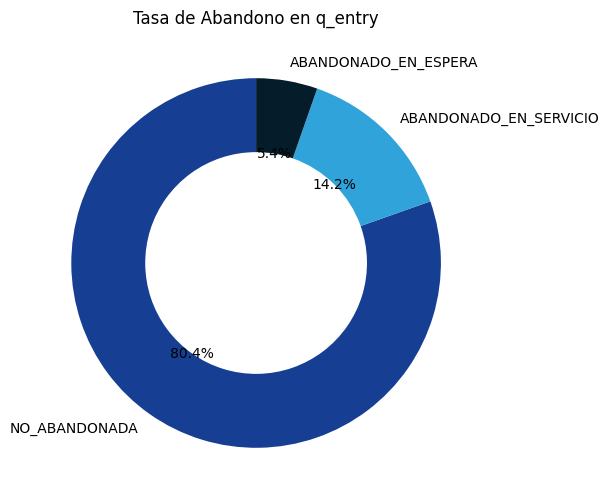

In [430]:
# Mckinsey-inspired colors
colors = ['#163E93','#30A3DA','#051C2A','#060200','#FFFFFF']

# Create a pie chart using the Mackinsley-inspired colors
plt.figure(figsize=(6, 6))
plt.pie(category_quit_counts, labels=category_quit_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), colors=colors)
plt.title('Tasa de Abandono en q_entry')
plt.show()

In [431]:
df_filtro_abandonan = df[(df['CATEGORIA_QUE_ABANDONA'] == 'ABANDONADO_EN_ESPERA') | (df['CATEGORIA_QUE_ABANDONA'] == 'ABANDONADO_EN_SERVICIO')]
df_filtro_abandonan['ID_de_CLIENTE'].count()

87029

In [432]:
df_filtro_abandonan['CATEGORIA_CLIENTE'].value_counts()

,count
CATEGORIA_CLIENTE,
CLIENTE_CON_ID,36664
CLIENTE_PROSPECTO,26027
CLIENTE_SIN_ID,24347


In [433]:
promedio_tiempo_espera_calc = df_filtro_abandonan.groupby('CATEGORIA_CLIENTE')['tiempo_espera_calc(seg)'].mean()
print(promedio_tiempo_espera_calc)

CATEGORIA_CLIENTE
CLIENTE_CON_ID        5.999045
CLIENTE_PROSPECTO    12.210666
CLIENTE_SIN_ID       34.823839
Name: tiempo_espera_calc(seg), dtype: float64


In [434]:
lista_columnas = df.columns.tolist()
lista_columnas

['fecha(a-m-d)',
 'CATEGORIA_CLIENTE',
 'ID_de_CLIENTE',
 'ID_de_llamada',
 'tipo_de_llamada',
 'prioridad',
 'tipo_de_servicio',
 'SERVIDOR',
 'Linea_VRU',
 'hora_entrada_llamada',
 'hora_salida_llamada',
 'tiempo_espera_calc(seg)',
 'hora_entrada_cola',
 'hora_salida_cola',
 'tiempo_cola_calc(seg)',
 'hora_ent_servicio',
 'hora_sal_servicio',
 'tiempo_de_serv_calc(seg)',
 'mes',
 'dia',
 'hora_entrada_llamada_corr',
 'hora_salida_llamada_corr',
 'CATEGORIA_QUE_ABANDONA']

In [435]:
category_counts = df_filtro_abandonan['CATEGORIA_CLIENTE'].value_counts()
# Calculamos el total por categoria
total_count = category_counts.sum()

# Calculamos el porcentaje para cada categoria sobre el total de abandonos
category_percentages = round((category_counts / total_count) * 100,0)

# Guardamos esta informacion en un dataframe para verlo como tabla
result_df = pd.DataFrame({'Conteo': category_counts, 'Porcentaje (%)': category_percentages})
result_df

,Conteo,Porcentaje (%)
CATEGORIA_CLIENTE,,
CLIENTE_CON_ID,36664,42.0
CLIENTE_PROSPECTO,26027,30.0
CLIENTE_SIN_ID,24347,28.0


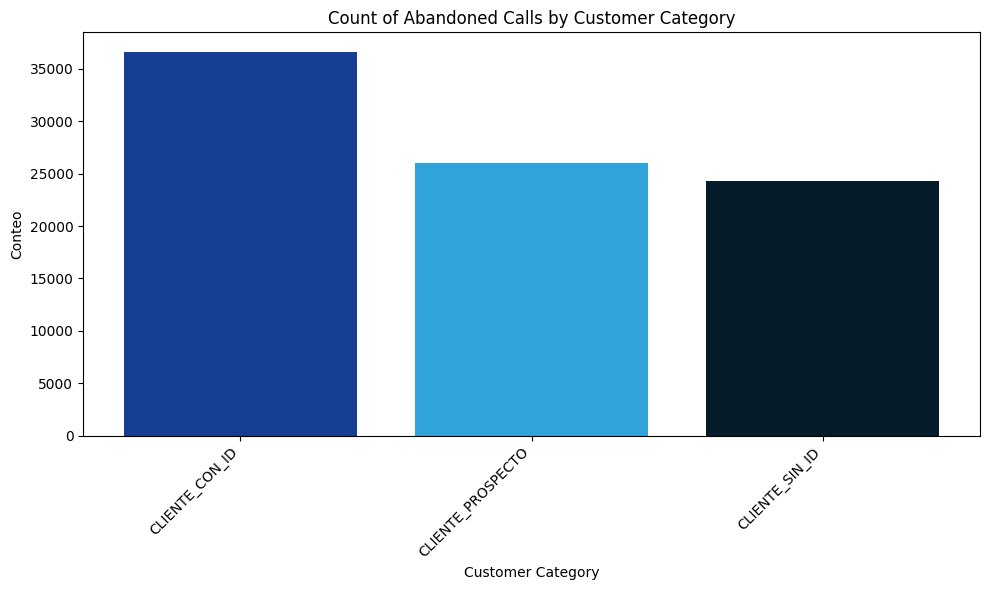

In [436]:
colors = ['#163E93','#30A3DA','#051C2A','#060200','#FFFFFF']

# Sort the DataFrame by counts in descending order
result_df_sorted = result_df.sort_values(by='Conteo', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.bar(result_df_sorted.index, result_df_sorted['Conteo'], color=colors)

# Add labels and title
plt.xlabel('Customer Category')
plt.ylabel('Conteo')
plt.title('Count of Abandoned Calls by Customer Category')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

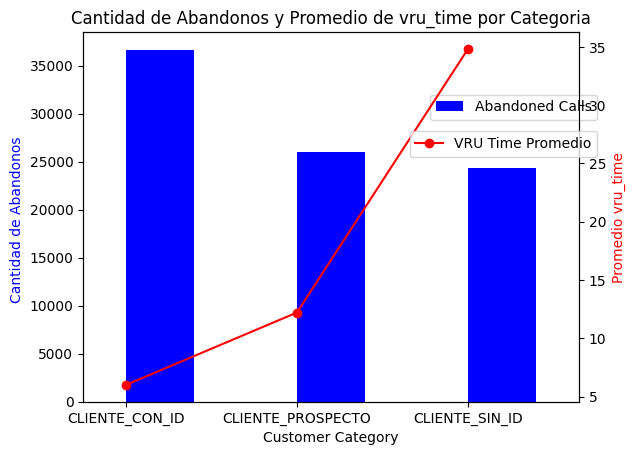

In [437]:
# Calculamos la tasa de abandono por categorias
count_abandoned_calls = df_filtro_abandonan['CATEGORIA_CLIENTE'].value_counts()

# Calculamos el vru_time promedio por customer category
average_vru_time = df_filtro_abandonan.groupby('CATEGORIA_CLIENTE')['tiempo_espera_calc(seg)'].mean()

# Vamos a graficarlos
fig, ax1 = plt.subplots()

# Garficamos con barras las llamadas que abandonan
count_abandoned_calls.plot(kind='bar', ax=ax1, color='b', position=0, width=0.4, label='Abandoned Calls')

# Creamos un segundo grafico para el promedio
ax2 = ax1.twinx()
average_vru_time.plot(kind='line', ax=ax2, color='r', marker='o', label='VRU Time Promedio')
ax1.set_xlabel('Customer Category')
ax1.set_ylabel('Cantidad de Abandonos ', color='b')
ax2.set_ylabel('Promedio vru_time', color='r')
plt.title('Cantidad de Abandonos y Promedio de vru_time por Categoria')
ax1.tick_params(axis='x', rotation=0)
ax1.legend(loc='upper right', bbox_to_anchor=(1.05, 0.85))
ax2.legend(loc='upper right', bbox_to_anchor=(1.05, 0.75))
plt.show()

In [438]:
df['tipo_de_llamada'].value_counts()

,count
tipo_de_llamada,
AGENT,353140
HANG,87594
PHANTOM,3599


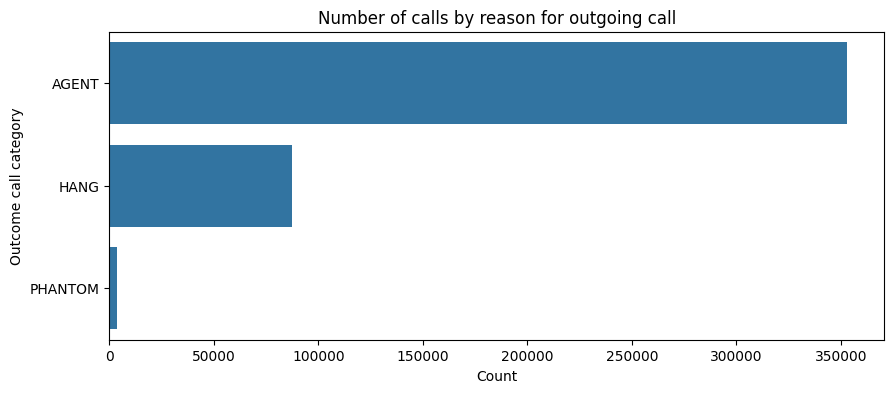

In [439]:
cantidad = df['tipo_de_llamada'].value_counts()

plt.figure(figsize=(10, 4))
sns.barplot(x=cantidad.values, y=cantidad.index)
plt.xlabel('Count')
plt.ylabel('Outcome call category')
plt.title('Number of calls by reason for outgoing call')
plt.show()

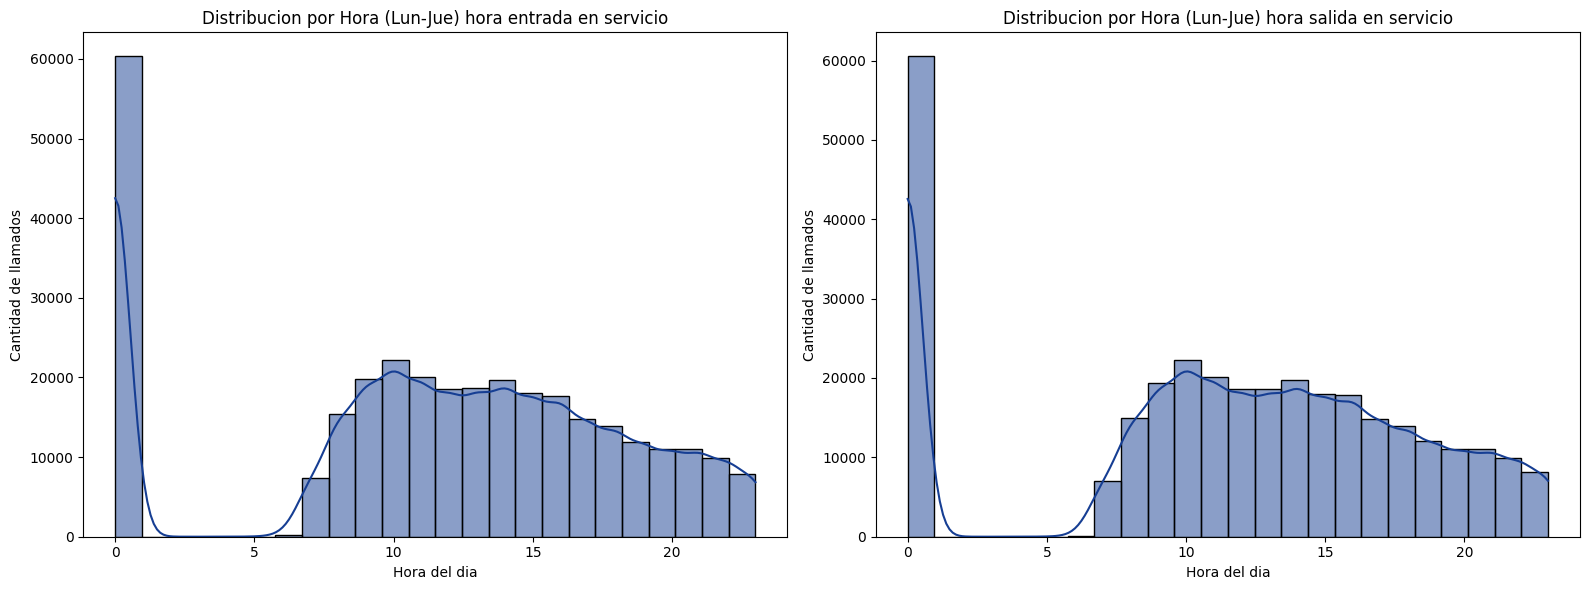

In [440]:
# Extraemos la hora de  'q_start' y de 'q_exit'
weekday_df['ser_start_hour'] = weekday_df['hora_ent_servicio'].dt.hour
weekday_df['ser_exit_hour'] = weekday_df['hora_sal_servicio'].dt.hour

# graficamos ambos juntos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Distribucion de tiempo en cola entrada
sns.histplot(weekday_df['ser_start_hour'], bins=24, kde=True, color='#163E93', ax=axes[0])
axes[0].set_title('Distribucion por Hora (Lun-Jue) hora entrada en servicio')
axes[0].set_xlabel('Hora del dia')
axes[0].set_ylabel('Cantidad de llamados')

# Distribucion de tiempo en cola salida
sns.histplot(weekday_df['ser_exit_hour'], bins=24, kde=True, color='#163E93', ax=axes[1])
axes[1].set_title('Distribucion por Hora (Lun-Jue) hora salida en servicio')
axes[1].set_xlabel('Hora del dia')
axes[1].set_ylabel('Cantidad de llamados')
plt.tight_layout()
plt.show()

In [441]:
# abandonan = (df['hora_ent_servicio'].dt.time == pd.to_datetime('00:00:00').time()).sum()
# perc_abandonan = round(abandonan/df['hora_ent_servicio'].count()*100, 2)


In [442]:
print('Cantidad abandonan en ser: ', cant_abandonan_ser)
print('Porcentaje sobre el total:', porcentaje_abandonan_ser)

Cantidad abandonan en ser:  63210
Porcentaje sobre el total: 14.0


In [443]:
# Filtramos las llamadas que corresponden a prioritarios que no fueran abandonadas
prioritarias_no_abandonan = df[(df['CATEGORIA_QUE_ABANDONA'] =='NO_ABANDONADA') & (df['prioridad'] == 2)]

# Calculate the average waiting time for priority calls
promedio_prioritarias_no_abandonan = prioritarias_no_abandonan['tiempo_de_serv_calc(seg)'].mean()

# Display the result
print(f"Numero de llamadas atendidas prioritarias: {len(prioritarias_no_abandonan)}")
print(f"Promedio de espera en cola para llamadas prioritarias: {promedio_prioritarias_no_abandonan}")
print("\nResumen Estadístico de llamadas prioritarias que no se abandonan:")
print(prioritarias_no_abandonan['tiempo_de_serv_calc(seg)'].describe())

Numero de llamadas atendidas prioritarias: 118100
Promedio de espera en cola para llamadas prioritarias: 208.31560541913632

Resumen Estadístico de llamadas prioritarias que no se abandonan:
count    118100.000000
mean        208.315605
std         285.395294
min           0.000000
25%          67.000000
50%         131.000000
75%         254.000000
max       30278.000000
Name: tiempo_de_serv_calc(seg), dtype: float64


In [444]:
df['tiempo_de_serv_calc(seg)'].describe()

,tiempo_de_serv_calc(seg)
count,444333.000000
mean,152.588957
std,282.289390
min,0.000000
25%,12.000000
50%,84.000000
75%,185.000000
max,61437.000000


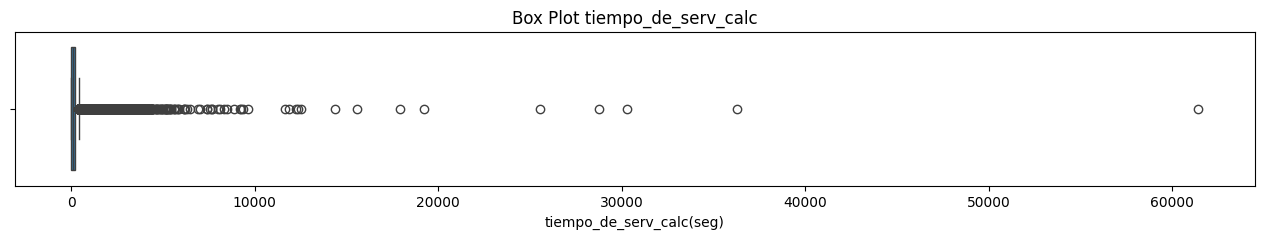

In [445]:
# Box plot
plt.figure(figsize=(16, 2))
sns.boxplot(x=df['tiempo_de_serv_calc(seg)'])
plt.title('Box Plot tiempo_de_serv_calc')
plt.xlabel('tiempo_de_serv_calc(seg)')
plt.show()